In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline
from ipywidgets import interact

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)

def f(degree=7):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x[:, np.newaxis], y)

    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.figure(figsize=(20,10))
    plt.scatter(x, y)
    plt.plot(xfit, yfit);
    plt.xlim(0, 10)
    plt.ylim(-3, 2)
    
    
interact(f, degree=(1,20));

A Jupyter Widget

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
def f(degree=2):
    gauss_model = make_pipeline(GaussianFeatures(degree), LinearRegression())
    gauss_model.fit(x[:, np.newaxis], y)
    yfit = gauss_model.predict(xfit[:, np.newaxis])

    plt.figure(figsize=(20,10))
    plt.scatter(x, y)
    plt.plot(xfit, yfit)
    plt.xlim(0, 10);
    plt.ylim(-1.5, 1.5);
    
interact(f, degree=(2,30));

A Jupyter Widget

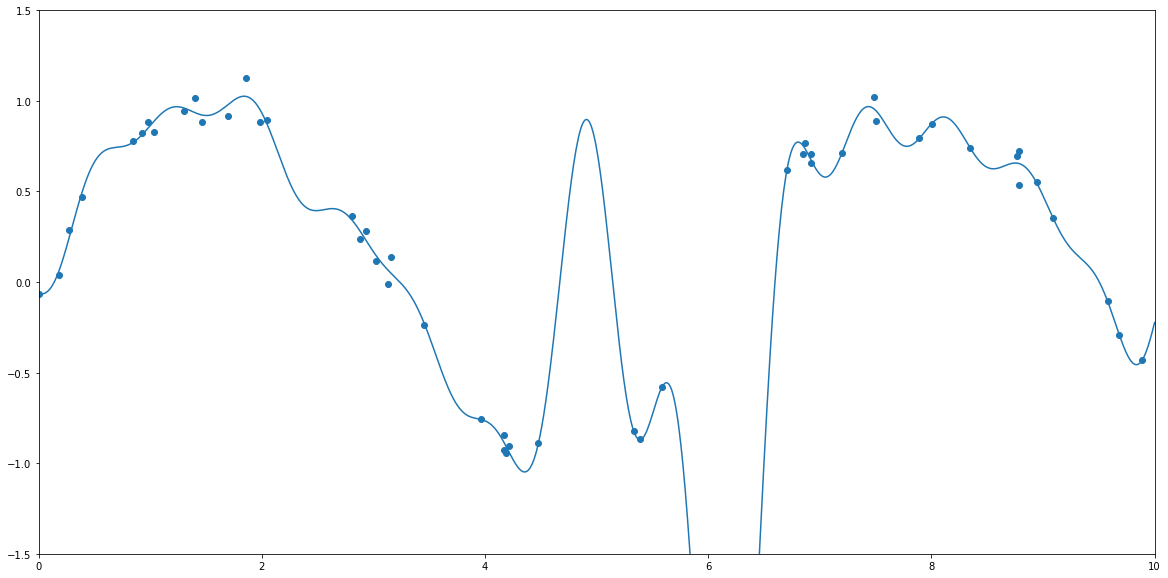

In [3]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

In [4]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True,  figsize=(20,10))
    
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))
    
def f(degree=2):
    model = make_pipeline(GaussianFeatures(degree), LinearRegression())
    basis_plot(model)

    #model.fit(x[:, np.newaxis], y)
    #print(model.steps[0][1].centers_)
    #print(model.steps[1][1].coef_)
    
interact(f, degree=(2,30));

A Jupyter Widget

In [5]:
from sklearn.linear_model import Ridge
def f(degree=30, alpha=0):
    if alpha == 0:
        alpha = 1e-100
        
    #model = make_pipeline(GaussianFeatures(degree), LinearRegression())

    model = make_pipeline(GaussianFeatures(degree), Ridge(alpha/1000))
    basis_plot(model, title='Гребневая регуляризация (L2)')
    
interact(f, degree=(2,30), alpha=(0,1000,1));

A Jupyter Widget

In [6]:
from sklearn.linear_model import Lasso
def f(degree=30, alpha=0):
    if alpha == 0:
        alpha = 1
        
    model = make_pipeline(GaussianFeatures(degree), Lasso(alpha/1000))
    basis_plot(model, title='Лассо-регуляризация (L1)')
    
interact(f, degree=(2,30), alpha=(1,1000, 1));

A Jupyter Widget